In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')

In [3]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
df_categorical = pd.get_dummies(df)

In [6]:
print(df_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
G1                   395 non-null int64
G2                   395 non-null int64
G3                   395 non-null int64
school_GP            395 non-null uint8
school_MS            395 non-null uint8
sex_F                395 non-null uint8
sex_M                395 non-null uint8
address_R            395 non-null uint8
address_U            395 non-null uint8
famsize_GT3    

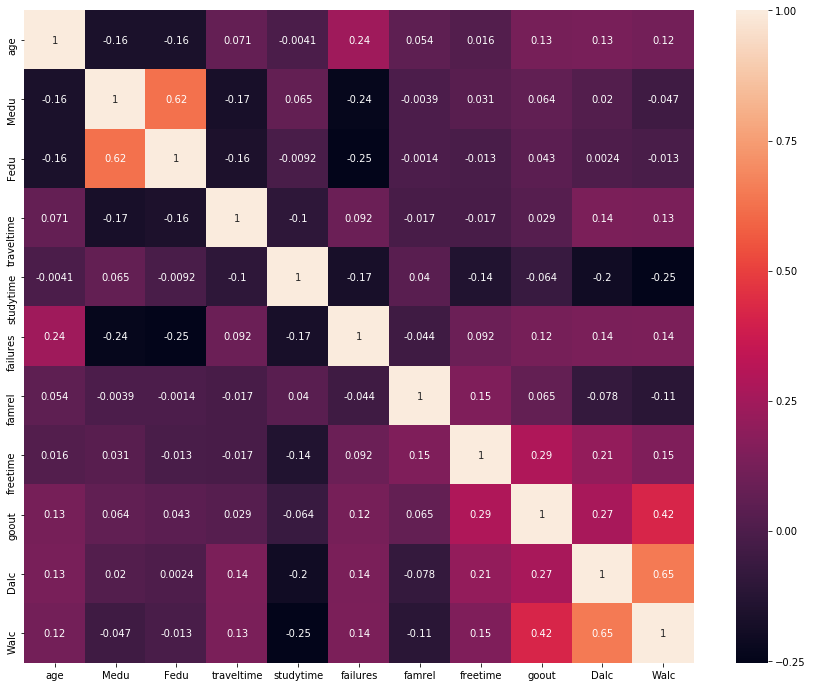

In [7]:
features = list(df_categorical.columns[0:11])

plt.figure(figsize=(15, 12))
sns.heatmap(df_categorical[features].corr(), annot=True)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df_categorical.drop(['G1', 'G2', 'G3'], axis=1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [10]:
scaler = StandardScaler().fit(df_categorical)
X_train = scaler.transform(df_categorical)

/home/fayaz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/fayaz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [11]:
y_train = pd.read_csv('student-mat.csv', sep=';', usecols=['G3'])

In [12]:
print(y_train.head())

   G3
0   6
1   6
2  10
3  15
4  10


In [13]:
print(y_train.shape)
y_train = y_train.values

(395, 1)


In [14]:
model = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='relu'),
    ])

In [15]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, shuffle=True)

In [17]:
model.fit(X_train, y_train, batch_size=16, epochs=20)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
264/264 [==============================] - 1s 3ms/sample - loss: 103.4205 - mean_absolute_error: 9.2594
Epoch 2/20
264/264 [==============================] - 0s 290us/sample - loss: 43.9914 - mean_absolute_error: 5.8691
Epoch 3/20
264/264 [==============================] - 0s 1ms/sample - loss: 15.5839 - mean_absolute_error: 3.0445
Epoch 4/20
264/264 [==============================] - 0s 700us/sample - loss: 9.1311 - mean_absolute_error: 2.1280
Epoch 5/20
264/264 [==============================] - 0s 609us/sample - loss: 5.9322 - mean_absolute_error: 1.7640
Epoch 6/20
264/264 [==============================] - 0s 319us/sample - loss: 4.4983 - mean_absolute_error: 1.5042
Epoch 7/20
264/264 [==============================] - 0s 198us/sample - loss: 3.7192 - mean_absolute_error: 1.3625
Epoch 8/20
264/264 [==============================] - 0s 265us/sample - loss: 3.1096 - mean_absolut

In [19]:
print(model.evaluate(X_test, y_test))

131/131 [==============================] - 0s 2ms/sample - loss: 3.0183 - mean_absolute_error: 1.3801
[3.0182508475907888, 1.3800951]


In [20]:
print(y_test[0])

[11]


In [21]:
predictions = model.predict(X_test)
print(predictions[0])

[11.381499]
